In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

# Stationary Situation

In [3]:
data1 = np.genfromtxt(fname='longterm2.csv', usecols=range(1, 17), delimiter=",", names=True)
data1_x = np.linspace(0, np.shape(data1)[0], np.shape(data1)[0])
print("longterm1 Samples: {}".format(np.shape(data1)[0]))

longterm1 Samples: 7402


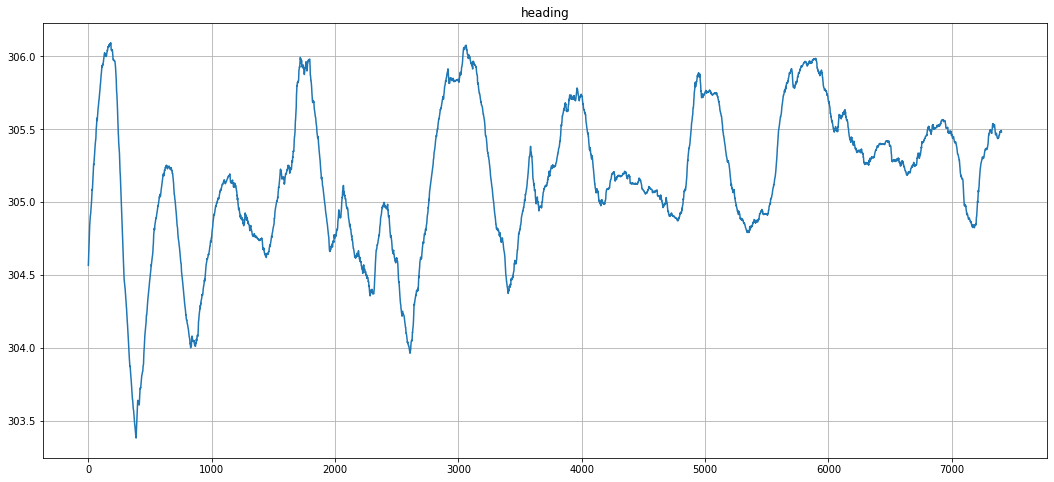

In [4]:
fig, axs = plt.subplots(1, 1, figsize=(18, 8))
axs.set_title("heading");
axs.grid(True);
axs.plot(data1_x, data1["heading"], linestyle='-');

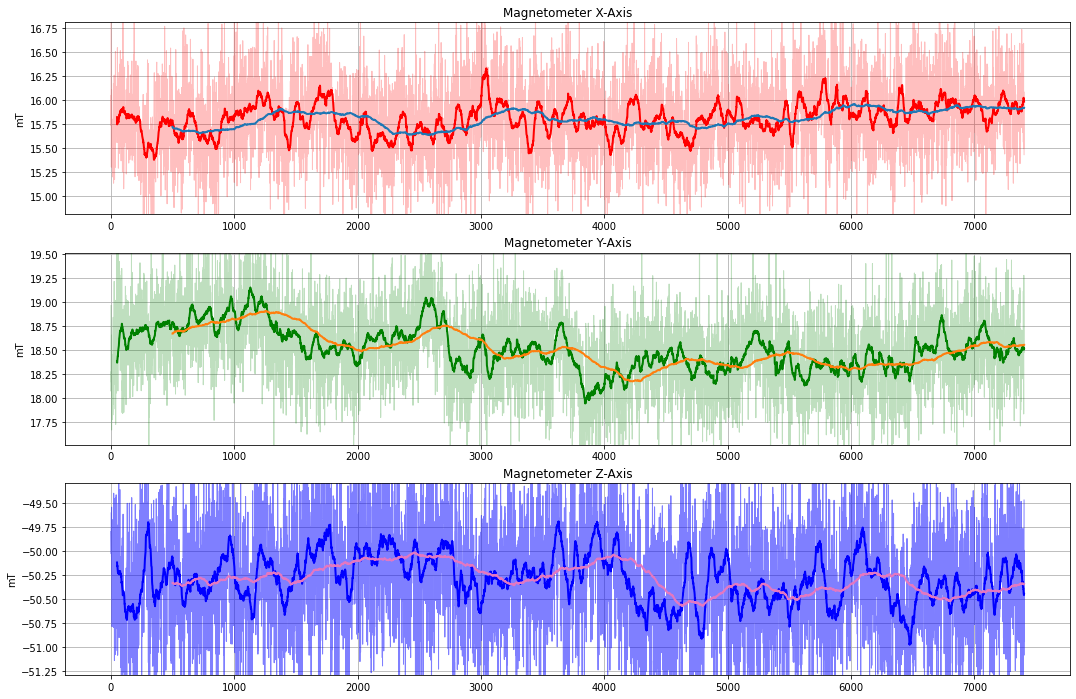

In [5]:
mean_1 = np.array([np.mean(data1["mx"]), np.mean(data1["my"]), np.mean(data1["mz"])]).round(4)

fig, axs = plt.subplots(3, 1, figsize=(18, 12))
num_avg = 50 # 5 seconds
ylim = 1

axs[0].set_title("Magnetometer X-Axis");
axs[0].grid(True);
axs[0].plot(data1_x, data1["mx"], color='r', alpha=0.25, linewidth=1, linestyle='-');
axs[0].plot(data1_x[num_avg-1:], np.convolve(data1["mx"], np.ones(num_avg), 'valid') / num_avg, color='r', linewidth=2, linestyle='-');
axs[0].plot(data1_x[10*num_avg-1:], np.convolve(data1["mx"], np.ones(10*num_avg), 'valid') / (10*num_avg), color='tab:blue', linewidth=2, linestyle='-');
axs[0].set_ylim(mean_1[0] - ylim, mean_1[0] + ylim)
axs[0].set(ylabel='mT');

axs[1].set_title("Magnetometer Y-Axis");
axs[1].grid(True);
axs[1].plot(data1_x, data1["my"], color='g', alpha=0.25, linewidth=1, linestyle='-');
axs[1].plot(data1_x[num_avg-1:], np.convolve(data1["my"], np.ones(num_avg), 'valid') / num_avg, color='g', linewidth=2, linestyle='-');
axs[1].plot(data1_x[10*num_avg-1:], np.convolve(data1["my"], np.ones(10*num_avg), 'valid') / (10*num_avg), color='tab:orange', linewidth=2, linestyle='-');
axs[1].set_ylim(mean_1[1] - ylim, mean_1[1] + ylim)
axs[1].set(ylabel='mT');

axs[2].set_title("Magnetometer Z-Axis");
axs[2].grid(True);
axs[2].plot(data1_x, data1["mz"], color='b', alpha=0.5, linewidth=1, linestyle='-');
axs[2].plot(data1_x[num_avg-1:], np.convolve(data1["mz"], np.ones(num_avg), 'valid') / num_avg, color='b', linewidth=2, linestyle='-');
axs[2].plot(data1_x[10*num_avg-1:], np.convolve(data1["mz"], np.ones(10*num_avg), 'valid') / (10*num_avg), color='tab:pink', linewidth=2, linestyle='-');
axs[2].set_ylim(mean_1[2] - ylim, mean_1[2] + ylim)
axs[2].set(ylabel='mT');

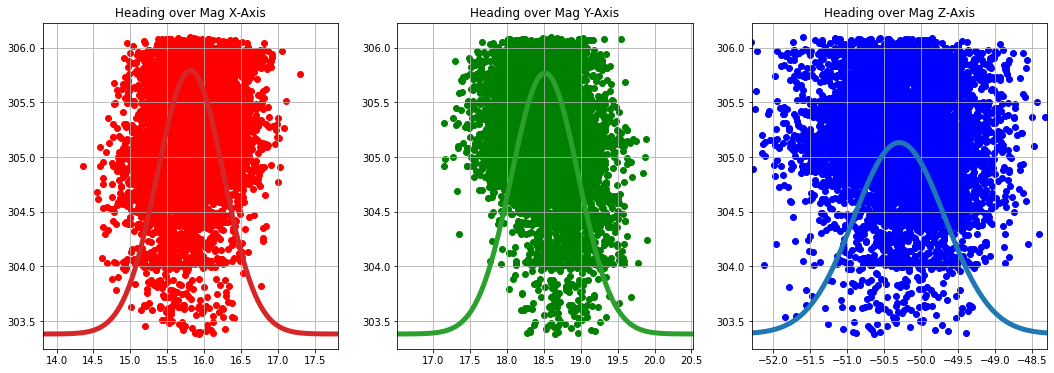

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
xlim = 2
headin_diff = (np.max(data1["heading"]) - np.min(data1["heading"]))

axs[0].set_title("Heading over Mag X-Axis");
axs[0].scatter(data1["mx"], data1["heading"], color='r', linewidth=1, linestyle='-');
x = np.linspace(mean_1[0] - xlim, mean_1[0] + xlim, 100)
axs[0].plot(x, stats.norm.pdf(x, np.mean(data1["mx"]), np.std(data1["mx"])) * headin_diff + np.min(data1["heading"]), color='tab:red', linewidth=5, linestyle='-');
axs[0].set_xlim(mean_1[0] - xlim, mean_1[0] + xlim)
axs[0].grid(True);

axs[1].set_title("Heading over Mag Y-Axis");
axs[1].scatter(data1["my"], data1["heading"], color='g', linewidth=1, linestyle='-');
x = np.linspace(mean_1[1] - xlim, mean_1[1] + xlim, 100)
axs[1].plot(x, stats.norm.pdf(x, np.mean(data1["my"]), np.std(data1["my"])) * headin_diff + np.min(data1["heading"]), color='tab:green', linewidth=5, linestyle='-');
axs[1].set_xlim(mean_1[1] - xlim, mean_1[1] + xlim)
axs[1].grid(True);

axs[2].set_title("Heading over Mag Z-Axis");
axs[2].scatter(data1["mz"], data1["heading"], color='b', linewidth=1, linestyle='-');
x = np.linspace(mean_1[2] - xlim, mean_1[2] + xlim, 100)
axs[2].plot(x, stats.norm.pdf(x, np.mean(data1["mz"]), np.std(data1["mz"])) * headin_diff + np.min(data1["heading"]), color='tab:blue', linewidth=5, linestyle='-');
axs[2].set_xlim(mean_1[2] - xlim, mean_1[2] + xlim)
axs[2].grid(True);

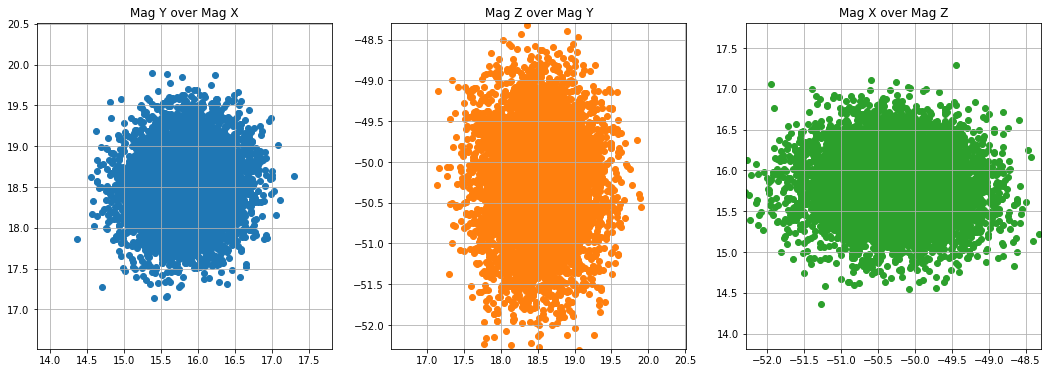

In [99]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
xlim = 2

axs[0].set_title("Mag Y over Mag X");
axs[0].scatter(data1["mx"], data1["my"], color='tab:blue', linewidth=1, linestyle='-');
axs[0].set_xlim(mean_1[0] - xlim, mean_1[0] + xlim)
axs[0].set_ylim(mean_1[1] - xlim, mean_1[1] + xlim)
axs[0].grid(True);

axs[1].set_title("Mag Z over Mag Y");
axs[1].scatter(data1["my"], data1["mz"], color='tab:orange', linewidth=1, linestyle='-');
axs[1].set_xlim(mean_1[1] - xlim, mean_1[1] + xlim)
axs[1].set_ylim(mean_1[2] - xlim, mean_1[2] + xlim)
axs[1].grid(True);

axs[2].set_title("Mag X over Mag Z");
axs[2].scatter(data1["mz"], data1["mx"], color='tab:green', linewidth=1, linestyle='-');
axs[2].set_xlim(mean_1[2] - xlim, mean_1[2] + xlim)
axs[2].set_ylim(mean_1[0] - xlim, mean_1[0] + xlim)
axs[2].grid(True);


# 360° Rotation

In [47]:
data2 = np.genfromtxt(fname='data4.csv', usecols=range(0, 2), delimiter=",", names=True)
data2_x = np.linspace(0, np.shape(data2)[0], np.shape(data2)[0])
print("Rotation Samples: {}".format(np.shape(data2)[0]))

Rotation Samples: 545


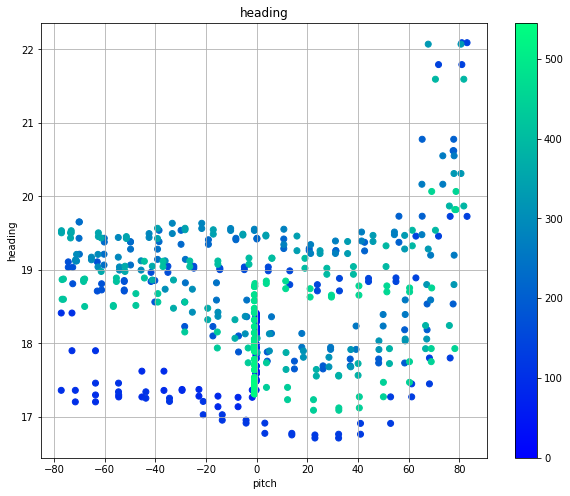

In [75]:
fig, axs = plt.subplots(1, 1, figsize=(10, 8))

axs.set_title("heading");
axs.grid(True);
plot = axs.scatter(data2["pitch"], data2["heading"], c=data2_x, cmap='winter');
fig.colorbar(plot);
axs.set(ylabel='heading', xlabel='pitch');